In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
import xgboost as xgb
import lightgbm as lgb
from mlxtend.classifier import StackingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [60]:
train=pd.read_csv('/content/train_yaOffsB.csv')
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [61]:
test=pd.read_csv('/content/test_pFkWwen.csv')
test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [75]:
train.fillna(-1,inplace=True)
test.fillna(-1,inplace=True)

In [76]:
train['source']='train'
test['source']='test'
data=pd.concat([train,test],ignore_index=True,sort=False)
data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,source
0,F00000001,188,1,0,1,0,0.0,0,1,0.0,train
1,F00000003,209,1,0,1,0,0.0,0,2,1.0,train
2,F00000004,257,1,0,1,0,0.0,0,2,1.0,train
3,F00000005,257,1,1,1,0,0.0,0,2,1.0,train
4,F00000006,342,1,0,1,0,0.0,0,2,1.0,train


**2. INITIAL EXPLORATION**

In [ ]:
print(train.columns.values)

['ID' 'Estimated_Insects_Count' 'Crop_Type' 'Soil_Type'
 'Pesticide_Use_Category' 'Number_Doses_Week' 'Number_Weeks_Used'
 'Number_Weeks_Quit' 'Season' 'Crop_Damage' 'source']


In [ ]:
data.isnull().sum()

ID                             0
Estimated_Insects_Count        0
Crop_Type                      0
Soil_Type                      0
Pesticide_Use_Category         0
Number_Doses_Week              0
Number_Weeks_Used          14893
Number_Weeks_Quit              0
Season                         0
Crop_Damage                59310
source                         0
dtype: int64

In [ ]:
train.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [ ]:
print(data[data['Number_Weeks_Used'].isnull()])

               ID  Estimated_Insects_Count  ...  Crop_Damage  source
5       F00000008                      448  ...          1.0   train
6       F00000009                      448  ...          1.0   train
10      F00000021                     1212  ...          0.0   train
17      F00000037                     2401  ...          1.0   train
35      F00000076                      257  ...          0.0   train
...           ...                      ...  ...          ...     ...
148128  F00155852                     2138  ...          NaN    test
148131  F00155861                     2267  ...          NaN    test
148138  F00155876                     2401  ...          NaN    test
148140  F00155885                     2542  ...          NaN    test
148165  F00155941                     3702  ...          NaN    test

[14893 rows x 11 columns]


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59310 entries, 0 to 59309
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       59310 non-null  object 
 1   Estimated_Insects_Count  59310 non-null  int64  
 2   Crop_Type                59310 non-null  int64  
 3   Soil_Type                59310 non-null  int64  
 4   Pesticide_Use_Category   59310 non-null  int64  
 5   Number_Doses_Week        59310 non-null  int64  
 6   Number_Weeks_Used        53417 non-null  float64
 7   Number_Weeks_Quit        59310 non-null  int64  
 8   Season                   59310 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 4.1+ MB


In [ ]:
# Let's check the frequency distribution of the feature
for col in train:
  freq=train[col].value_counts()
  print('\nThe frequency distribution of '+col+ ":")
  print(freq)  


The frequency distribution of ID:
F00113597    1
F00085009    1
F00134850    1
F00069184    1
F00147049    1
            ..
F00044093    1
F00101713    1
F00114833    1
F00135178    1
F00112080    1
Name: ID, Length: 88858, dtype: int64

The frequency distribution of Estimated_Insects_Count:
1212    3438
1132    3370
1478    3358
1385    3309
1056    3235
        ... 
3896     134
3515     123
4097     113
231       89
169       63
Name: Estimated_Insects_Count, Length: 71, dtype: int64

The frequency distribution of Crop_Type:
0    63589
1    25269
Name: Crop_Type, dtype: int64

The frequency distribution of Soil_Type:
0    48124
1    40734
Name: Soil_Type, dtype: int64

The frequency distribution of Pesticide_Use_Category:
2    63709
3    24312
1      837
Name: Pesticide_Use_Category, dtype: int64

The frequency distribution of Number_Doses_Week:
20    22589
40    12298
10    12111
30    10438
15     8178
5      5520
25     4890
60     4367
50     3361
35     1832
45      936
0     

In [ ]:
#Now lets see how much crop damage took place
cat0=train[train['Crop_Damage']==0]
cat1=train[train['Crop_Damage']==1]
cat2=train[train['Crop_Damage']==2]
cat0p=(len(cat0)/len(train))*100
print('Alive crop')
print(cat0p)
cat1p=(len(cat1)/len(train))*100
print('Damage due to other cause')
print(cat1p)
cat2p=(len(cat2)/len(train))*100
print('Damage due to pesticides')
print(cat2p)


Alive crop
83.54678250692116
Damage due to other cause
13.850187940309258
Damage due to pesticides
2.6030295527695877


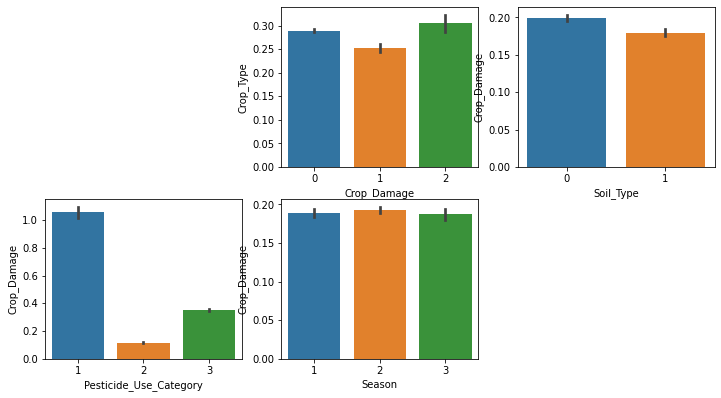

In [ ]:
# Lets go through the features one by one by using matplotlib and barplots
plt.figure(figsize=[12,10])
#plt.subplot(331)

#sns.distplot(surv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
#sns.distplot(notsurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red',
            #axlabel='Age')
plt.subplot(332)
sns.barplot('Crop_Damage', 'Crop_Type', data=train)
plt.subplot(333)
sns.barplot('Soil_Type', 'Crop_Damage', data=train)
plt.subplot(334)
sns.barplot('Pesticide_Use_Category', 'Crop_Damage', data=train)
plt.subplot(335)
sns.barplot('Season', 'Crop_Damage', data=train)

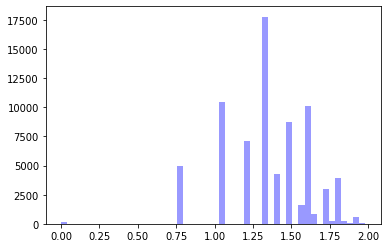

In [ ]:
sns.distplot(np.log10(cat0['Number_Doses_Week'].dropna().values+1), kde=False, color='blue')

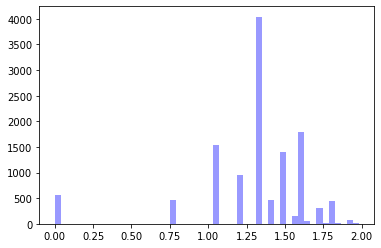

In [ ]:
sns.distplot(np.log10(cat1['Number_Doses_Week'].dropna().values+1), kde=False, color='blue')

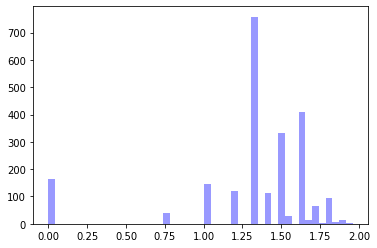

In [ ]:
sns.distplot(np.log10(cat2['Number_Doses_Week'].dropna().values+1), kde=False, color='blue')

In [ ]:
pd.crosstab(train['Crop_Type'],train['Crop_Damage'],normalize='index')

Crop_Damage,0,1,2
Crop_Type,,,
0,0.829986,0.144742,0.025272
1,0.849262,0.122799,0.027939


In [ ]:
pd.crosstab(train['Soil_Type'],train['Crop_Damage'],normalize='index')

Crop_Damage,0,1,2
Soil_Type,,,
0,0.827882,0.144481,0.027637
1,0.844430,0.131438,0.024132


In [ ]:
pd.crosstab(train['Pesticide_Use_Category'],train['Crop_Damage'],normalize='index')

Crop_Damage,0,1,2
Pesticide_Use_Category,,,
1,0.140980,0.661888,0.197133
2,0.894034,0.095308,0.010658
3,0.705907,0.233671,0.060423


In [ ]:
pd.crosstab(train['Season'],train['Crop_Damage'],normalize='index')

Crop_Damage,0,1,2
Season,,,
1,0.836109,0.139320,0.024571
2,0.834223,0.138317,0.027460
3,0.837597,0.137721,0.024682


In [ ]:
pd.crosstab(train['Number_Doses_Week'],train['Crop_Damage'],normalize='index')

Crop_Damage,0,1,2
Number_Doses_Week,,,
0,0.140980,0.661888,0.197133
5,0.907065,0.085688,0.007246
10,0.860540,0.127322,0.012138
15,0.869161,0.116165,0.014674
20,0.787507,0.178937,0.033556
25,0.881391,0.095706,0.022904
30,0.834259,0.134030,0.031711
35,0.899017,0.084607,0.016376
40,0.820621,0.146121,0.033257


In [ ]:
pd.crosstab(train['Number_Weeks_Used'],train['Crop_Damage'],normalize='index')

Crop_Damage,0,1,2
Number_Weeks_Used,,,
0.0,0.144595,0.668919,0.186486
5.0,0.942308,0.057692,0.000000
6.0,0.959569,0.040431,0.000000
7.0,0.959330,0.038278,0.002392
8.0,0.944544,0.053667,0.001789
...,...,...,...
63.0,0.620000,0.340000,0.040000
64.0,0.590909,0.340909,0.068182
65.0,0.387097,0.483871,0.129032


In [ ]:
pd.crosstab(train['Number_Weeks_Quit'],train['Crop_Damage'],normalize='index')

Crop_Damage,0,1,2
Number_Weeks_Quit,,,
0,0.709797,0.229999,0.060204
1,0.950382,0.043130,0.006489
2,0.924171,0.063799,0.012031
3,0.903801,0.081458,0.014740
4,0.904272,0.081487,0.014241
5,0.881667,0.098905,0.019428
6,0.889319,0.095201,0.015480
7,0.887924,0.096774,0.015302
8,0.892764,0.093723,0.013514


In [ ]:
pd.crosstab(train['Estimated_Insects_Count'],train['Crop_Damage'],normalize='index')

Crop_Damage,0,1,2
Estimated_Insects_Count,,,
150,0.952756,0.043307,0.003937
151,0.985915,0.014085,0.000000
168,0.961783,0.038217,0.000000
169,0.968254,0.031746,0.000000
188,0.974811,0.025189,0.000000
...,...,...,...
3702,0.617504,0.341977,0.040519
3895,0.571014,0.397101,0.031884
3896,0.619403,0.335821,0.044776


**RELATIONS BETWEEN FEATURES**

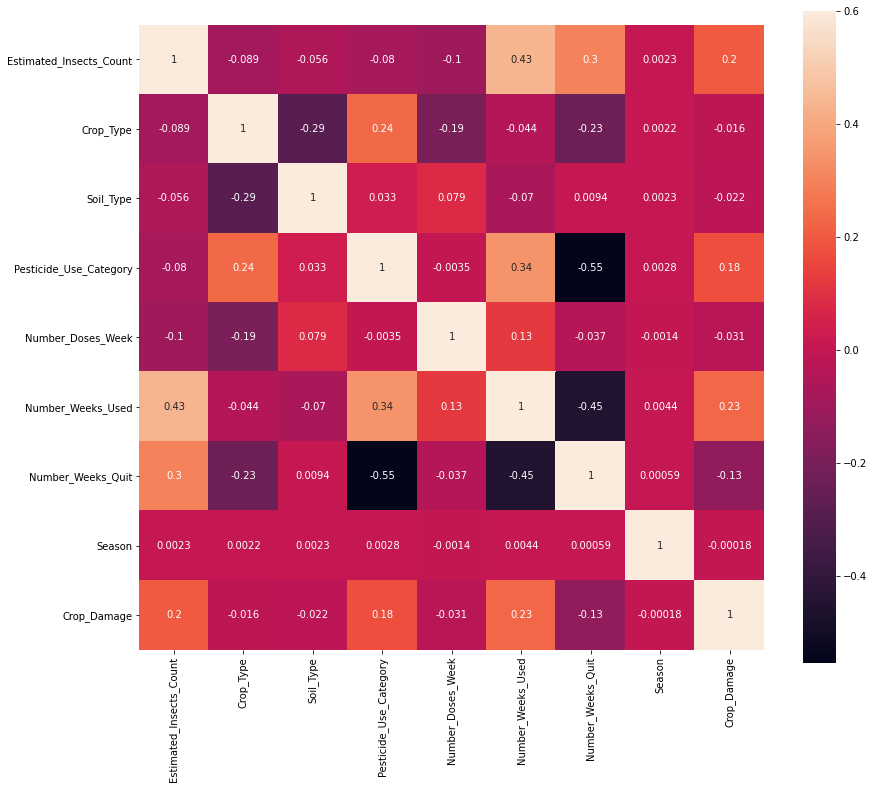

In [ ]:
plt.figure(figsize=(14,12))
foo = sns.heatmap(train.drop('ID',axis=1).corr(), vmax=0.6, square=True, annot=True)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


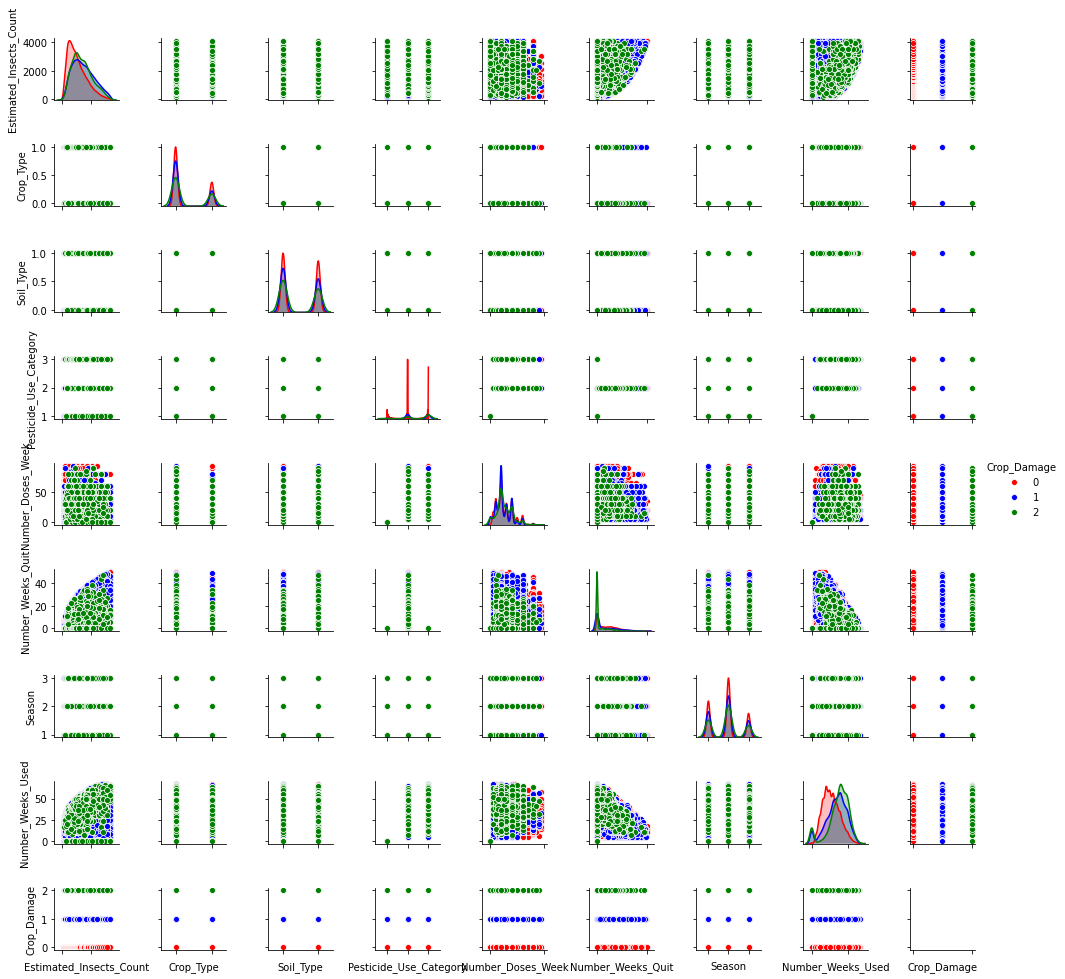

In [ ]:
cols=['Estimated_Insects_Count','Crop_Type','Soil_Type','Pesticide_Use_Category','Number_Doses_Week','Number_Weeks_Quit','Season','Number_Weeks_Used','Crop_Damage']
g=sns.pairplot(data=train.dropna(),vars=cols, size=1.5,
                 hue='Crop_Damage', palette=['red','blue','green'])
g.set(xticklabels=[])

In [ ]:
data['Number_Doses_Week'].unique()

array([ 0, 30, 40, 60, 20, 25, 45, 50, 15, 10,  5, 35, 70, 55, 80, 90, 85,
       65, 75, 95])

In [ ]:
data['Number_Weeks_Quit'].unique()

array([ 0,  1,  9,  4, 13,  3, 14,  6,  2, 12, 15, 10,  8, 11,  7,  5, 17,
       18, 16, 20, 21, 19, 22, 24, 23, 27, 25, 28, 26, 29, 30, 31, 33, 32,
       36, 37, 34, 39, 44, 41, 35, 47, 46, 40, 42, 38, 43, 45, 49, 50, 48])

In [ ]:
data['Number_Weeks_Used'].unique()

array([ 0., nan, 26., 20., 15., 14., 19., 24.,  8., 23., 25., 28., 29.,
       22., 21., 17., 30., 35., 32., 27., 16., 31., 33., 34., 39., 38.,
       42., 40., 41., 36., 44., 37., 46., 45., 47., 43., 50., 10., 49.,
       53., 48., 51., 54., 52., 55., 56., 61., 18., 57., 62., 60., 63.,
       66., 59., 64., 13.,  7.,  5., 12.,  6.,  9., 58., 11., 65., 67.])

In [ ]:
data['Estimated_Insects_Count'].unique()

array([ 188,  209,  257,  342,  448,  577,  731, 1132, 1212, 1575, 1785,
       2138, 2401, 2999, 3516, 3895, 4096,  150,  151,  168,  232,  231,
        256,  283,  312,  311,  375,  411,  410,  488,  489,  531,  626,
        625,  677,  732,  789,  790,  851,  850,  915,  916,  984, 1056,
       1296, 1297, 1385, 1478, 1576, 1678, 1786, 1898, 2015, 2016, 2139,
       2267, 2402, 2542, 2541, 2688, 2687, 2840, 3164, 3165, 3336, 3337,
       3702, 3896,  169, 3515, 4097])

In [77]:
bins = [-1,5,10,15,20,25,30,35,40,45,50]
labels = ['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50']
data['NWQ'] = pd.cut(data['Number_Weeks_Quit'], bins=bins, labels=labels)
data['NWQ'].value_counts()

0-5      67672
10-15    21172
5-10     20160
15-20    16932
20-25    10182
25-30     6566
30-35     3479
35-40     1448
40-45      457
45-50      100
Name: NWQ, dtype: int64

In [ ]:
#bins = [-1,5,10,15,20,25,30,35,40,45,50,55,60,65,70]
#labels = ['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','65-70']
#data['NWU'] = pd.cut(data['Number_Weeks_Used'], bins=bins, labels=labels)
#data['NWU'].value_counts()

25-30    15914
20-25    15725
15-20    15402
30-35    13458
35-40    12577
10-15     9875
40-45     8323
45-50     6174
5-10      4969
50-55     3106
0-5       1866
55-60     1515
60-65      368
65-70       38
Name: NWU, dtype: int64

**FEATURE ENGINEERING**

In [78]:
data['new_PUC1']=data['Pesticide_Use_Category']==1
data['new_PUC2']=data['Pesticide_Use_Category']==2
data['new_PUC3']=data['Pesticide_Use_Category']==3

In [79]:
data['CP0']=data['Crop_Type']==0
data['CP1']=data['Crop_Type']==1

In [80]:
data['S1']=data['Season']==1
data['S2']=data['Season']==2
data['S3']=data['Season']==3

In [81]:
data['ST0']=data['Soil_Type']==0
data['ST1']=data['Soil_Type']==1

In [82]:
data['NWQ'] = data['NWQ'].astype("category")
data['NWQ'].cat.categories = [0,1,2,3,4,5,6,7,8,9]

In [83]:
data['ID_value'] = data['ID'].apply(lambda x: x.strip('F')).astype('int')

In [84]:
data = data.sort_values(['ID_value'])

In [85]:
data =data.reset_index(drop=True)

In [87]:
# make the loop
# the features that we are targeting are - 
'''
1 - Group
2 - Group_Change 
3 - Group_First
4 - Group_Last
5 - Batch_Last
'''

# Initialization
data['Group'] = 0 
data['Group'][0] = 1
data['Group_Change'] = 0
data['Group_First'] = 0
data['Group_Last'] = 0
data['Batch_Last'] = 0
data['Group_First'][0] = 1
data['Soil_Change'] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [88]:
data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,source,NWQ,new_PUC1,new_PUC2,new_PUC3,CP0,CP1,S1,S2,S3,ST0,ST1,ID_value,Group,Group_Change,Group_First,Group_Last,Batch_Last,Soil_Change
0,F00000001,188,1,0,1,0,0.0,0,1,0.0,train,0,True,False,False,False,True,True,False,False,True,False,1,1,0,1,0,0,0
1,F00000002,188,1,1,1,0,-1.0,0,2,NaN,test,0,True,False,False,False,True,False,True,False,False,True,2,0,0,0,0,0,0
2,F00000003,209,1,0,1,0,0.0,0,2,1.0,train,0,True,False,False,False,True,False,True,False,True,False,3,0,0,0,0,0,0
3,F00000004,257,1,0,1,0,0.0,0,2,1.0,train,0,True,False,False,False,True,False,True,False,True,False,4,0,0,0,0,0,0
4,F00000005,257,1,1,1,0,0.0,0,2,1.0,train,0,True,False,False,False,True,False,True,False,False,True,5,0,0,0,0,0,0


In [90]:
#Start loop
for i in range(2,data.shape[0]):
  if (abs(data['Estimated_Insects_Count'][i] - data['Estimated_Insects_Count'][i-1]) > 1):
    data['Group'][i] = data['Group'][i-1] + 1
    data['Group_First'][i] = 1
    data['Group_Last'][i-1] = 1
    data['Batch_Last'][i-1] = 1
    data['Group_Num'] = 1
  else:
    if (data['Number_Doses_Week'][i] >= data['Number_Doses_Week'][i-1]):
      if (data['Soil_Type'][i] == data['Soil_Type'][i-1]):
        data['Group'][i] =data['Group'][i-1]
        data['Group_Num'][i] = data['Group_Num'][i-1] + 1
      else:
        data['Group'][i] =data['Group'][i-1] + 1
        data['Group_Num'] = 1
    else:
      data['Group'][i] = data['Group'][i-1] + 1
      data['Group_Change'][i] = 1
      data['Group_First'][i] = 1
      data['Group_Last'][i-1] = 1
      data['Group'][i] = data['Group'][i-1] + 1
  # if (i%1000==0):
  #   # print(i,'th iteration completed')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: Se

In [91]:

for i in range(1,(data.shape[0]-1)):
  if(data['Group_Last'][i] == 1 and data['Soil_Type'][i] != data['Soil_Type'][i+1]):
    data['Soil_Change'][i] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#data['NWU'] = data['NWU'].astype("category")
#data['NWU'].cat.categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]

In [ ]:
#data['Total_num_weeks']=data['Number_Weeks_Used']+ data['Number_Weeks_Quit']

In [35]:
#data['Crop_Damage_lag1'] = data['Crop_Damage_lag1'].fillna((data['Crop_Damage_lag1'].mean()))

In [38]:
#data['Crop_Damage_lag2'] = data['Crop_Damage_lag2'].fillna((data['Crop_Damage_lag2'].mean()))

In [41]:
#data['Number_Weeks_Used_lag1'] = data['Number_Weeks_Used_lag1'].fillna((data['Number_Weeks_Used_lag1'].mean()))

In [40]:
#data['Number_Weeks_Used_lag2'] = data['Number_Weeks_Used_lag2'].fillna((data['Number_Weeks_Used_lag2'].mean()))

**MODELLING**

In [92]:
#Divide into test and train:
train_new = data.loc[data['source']=="train"]
test_new = data.loc[data['source']=="test"]
#Drop unnecessary columns:
test_new.drop(['source'],axis=1,inplace=True)
train_new.drop(['source'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [93]:
train_new.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,NWQ,new_PUC1,new_PUC2,new_PUC3,CP0,CP1,S1,S2,S3,ST0,ST1,ID_value,Group,Group_Change,Group_First,Group_Last,Batch_Last,Soil_Change,Group_Num
0,F00000001,188,1,0,1,0,0.0,0,1,0.0,0,True,False,False,False,True,True,False,False,True,False,1,1,0,1,0,0,0,1
2,F00000003,209,1,0,1,0,0.0,0,2,1.0,0,True,False,False,False,True,False,True,False,True,False,3,1,0,1,1,1,0,1
3,F00000004,257,1,0,1,0,0.0,0,2,1.0,0,True,False,False,False,True,False,True,False,True,False,4,2,0,1,0,0,0,1
4,F00000005,257,1,1,1,0,0.0,0,2,1.0,0,True,False,False,False,True,False,True,False,False,True,5,3,0,0,1,1,1,1
5,F00000006,342,1,0,1,0,0.0,0,2,1.0,0,True,False,False,False,True,False,True,False,True,False,6,4,0,1,1,1,1,1


In [94]:
from sklearn.model_selection import train_test_split
dtrain , dtest = train_test_split(train_new, test_size = 0.2)
print(train.shape,dtrain.shape,dtest.shape)

(88858, 11) (71086, 29) (17772, 29)


In [95]:
print(train_new.columns.values)

['ID' 'Estimated_Insects_Count' 'Crop_Type' 'Soil_Type'
 'Pesticide_Use_Category' 'Number_Doses_Week' 'Number_Weeks_Used'
 'Number_Weeks_Quit' 'Season' 'Crop_Damage' 'NWQ' 'new_PUC1' 'new_PUC2'
 'new_PUC3' 'CP0' 'CP1' 'S1' 'S2' 'S3' 'ST0' 'ST1' 'ID_value' 'Group'
 'Group_Change' 'Group_First' 'Group_Last' 'Batch_Last' 'Soil_Change'
 'Group_Num']


In [96]:
cols = ['Estimated_Insects_Count','Crop_Type','Soil_Type','Number_Doses_Week','NWQ','Season','new_PUC1','new_PUC2','new_PUC3','CP0','CP1','S1','S2','S3','ST0','ST1',
        'ID_value','Group','Group_Change' ,'Group_First', 'Group_Last' ,'Batch_Last' ,'Soil_Change','Group_Num',]
tcols = np.append(['Crop_Damage'],cols)

df = dtrain.loc[:,tcols].dropna()
X = df.loc[:,cols]
y = df['Crop_Damage']


In [97]:
clf_lgb = lgb.LGBMClassifier(
    max_depth=2,
    n_estimators=500,
    subsample=0.5,
    learning_rate=0.1
    )
clf_lgb.fit(X,y)
score_lgb = cross_val_score(clf_lgb, X, y, cv=5).mean()
print(score_lgb)

0.9136820167178838


In [98]:
X_train = dtrain.drop(['Number_Weeks_Used','Crop_Damage','ID'], axis=1)
Y_train = dtrain["Crop_Damage"]
X_test  = dtest.drop(['Number_Weeks_Used','Crop_Damage','ID'], axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((71086, 26), (71086,), (17772, 26))

In [99]:
X_train.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Quit          0
Season                     0
NWQ                        0
new_PUC1                   0
new_PUC2                   0
new_PUC3                   0
CP0                        0
CP1                        0
S1                         0
S2                         0
S3                         0
ST0                        0
ST1                        0
ID_value                   0
Group                      0
Group_Change               0
Group_First                0
Group_Last                 0
Batch_Last                 0
Soil_Change                0
Group_Num                  0
dtype: int64

In [100]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.53

**MODELLING ON TEST SET**

In [51]:
test_new.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,new_PUC1,new_PUC2,new_PUC3,CP0,CP1,S1,S2,S3,ST0,ST1,NWQ,ID_value,Soil_Type_Damage,Estimated_Insects_Count_Damage,Crop_Type_Damage,Pesticide_Use_Category_Damage,Season_Damage,Soil_Type_Damage_lag2,Estimated_Insects_Count_Damage_lag2,Crop_Type_Damage_lag2,Pesticide_Use_Category_Damage_lag2,Season_Damage_lag2,Crop_Damage_lag1,Estimated_Insects_Count_lag1,Crop_Type_lag1,Soil_Type_lag1,Pesticide_Use_Category_lag1,Number_Doses_Week_lag1,Number_Weeks_Used_lag1,Number_Weeks_Quit_lag1,Season_lag1,Crop_Damage_lag2,Estimated_Insects_Count_lag2,Crop_Type_lag2,Soil_Type_lag2,Pesticide_Use_Category_lag2,Number_Doses_Week_lag2,Number_Weeks_Used_lag2,Number_Weeks_Quit_lag2,Season_lag2
1,F00000002,188,1,1,1,0,NaN,0,2,NaN,True,False,False,False,True,False,True,False,False,True,0,2,-999.0,0.0,0.000000,0.00,-999.000000,-999.00,-999.0,-999.00,-999.000000,-999.0,0.00000,188,1,0,1,0,0.0,0,1,-999.000000,-999,1,0,-999,-999,-999.000000,-999,-999
6,F00000007,410,1,1,1,0,0.0,0,2,NaN,True,False,False,False,True,False,True,False,False,True,0,7,1.0,-999.0,1.000000,1.00,1.000000,-999.00,-999.0,0.75,0.750000,1.0,1.00000,342,1,0,1,0,0.0,0,2,1.000000,257,1,0,1,0,0.000000,0,2
10,F00000011,626,1,0,1,0,0.0,0,2,NaN,True,False,False,False,True,False,True,False,True,False,0,11,1.0,-999.0,1.250000,1.25,1.000000,0.75,-999.0,1.00,1.000000,1.0,2.00000,577,1,0,1,0,0.0,0,1,1.000000,448,1,0,1,0,28.640825,0,2
12,F00000013,731,1,0,1,0,0.0,0,2,NaN,True,False,False,False,True,False,True,False,True,False,0,13,1.0,0.0,1.333333,1.00,0.666667,1.25,-999.0,1.25,1.333333,1.0,0.00000,731,0,0,1,0,0.0,0,2,0.168075,626,0,0,1,0,0.000000,0,2
13,F00000014,789,0,0,1,0,0.0,0,1,NaN,True,False,False,True,False,True,False,False,True,False,0,14,1.0,-999.0,0.666667,1.00,1.000000,1.00,-999.0,1.00,1.000000,0.0,0.17932,731,1,0,1,0,0.0,0,2,0.000000,731,1,0,1,0,0.000000,0,2


In [53]:
X_train = dtrain.copy()
X_train.drop(['ID','Number_Weeks_Used','Crop_Damage'],axis=1,inplace=True)
Y_train =dtrain['Crop_Damage']
X_test = test_new.copy()
X_test.drop(['ID','Number_Weeks_Used','Crop_Damage'],axis=1,inplace=True)

In [54]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.56

In [55]:
sub=pd.read_csv('/content/sample_submission_O1oDc4H.csv')

In [56]:
sub.head()

,ID,Crop_Damage
0,F00000002,1
1,F00000011,1
2,F00000014,1
3,F00000015,1
4,F00000016,1


In [57]:
sub['Crop_Damage'] = Y_pred

In [58]:
sub['Crop_Damage'] = sub['Crop_Damage'].astype(int)

In [59]:
sub.to_csv("analytics.csv",index=False)